In [1]:
import pandas as pd

# Download the Data From Celestrak

Celestrak is a wonderful resource for data on the objects and space and their locations. 

In [2]:
# Pull the latest CSV from the site
df = pd.read_csv("https://celestrak.com/pub/satcat.csv")

# Preview The Data

In [3]:
df.head()

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.73,34.25,3832.0,651.0,0.122,NaN,EA,ORB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51912 entries, 0 to 51911
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECT_NAME       51912 non-null  object 
 1   OBJECT_ID         51912 non-null  object 
 2   NORAD_CAT_ID      51912 non-null  int64  
 3   OBJECT_TYPE       51912 non-null  object 
 4   OPS_STATUS_CODE   33229 non-null  object 
 5   OWNER             51912 non-null  object 
 6   LAUNCH_DATE       51912 non-null  object 
 7   LAUNCH_SITE       51912 non-null  object 
 8   DECAY_DATE        26277 non-null  object 
 9   PERIOD            51055 non-null  float64
 10  INCLINATION       51055 non-null  float64
 11  APOGEE            51055 non-null  float64
 12  PERIGEE           51055 non-null  float64
 13  RCS               32931 non-null  float64
 14  DATA_STATUS_CODE  1090 non-null   object 
 15  ORBIT_CENTER      51912 non-null  object 
 16  ORBIT_TYPE        51912 non-null  object

In [5]:
df.describe()

,NORAD_CAT_ID,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS
count,51912.000000,51055.000000,51055.000000,51055.000000,51055.000000,32931.000000
mean,25957.122554,192.095694,69.955380,4108.999295,1915.994692,3.662501
std,14986.895124,760.754535,25.105577,15352.945233,6960.713767,19.296260
min,1.000000,79.650000,0.000000,46.000000,0.000000,0.000100
25%,12978.750000,89.400000,53.050000,277.000000,197.000000,0.013700
50%,25956.500000,94.650000,72.820000,541.000000,407.000000,0.064700
75%,38934.250000,102.670000,95.660000,979.000000,747.000000,1.091350
max,52008.000000,95687.680000,150.940000,746743.000000,275678.000000,928.310000


# Data Wrangling

## Add A Count Column

In [6]:
df['COUNT'] = 1
df.head()

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,COUNT
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP,1
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP,1
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP,1
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP,1
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.73,34.25,3832.0,651.0,0.122,NaN,EA,ORB,1


# Extract the Month and Month Year

In [7]:
df['MONTH'] = df['LAUNCH_DATE']
df['YEAR'] = df['LAUNCH_DATE']
df['MONTH'] = df['MONTH'].apply(lambda x: x.split("-")[1])
df['YEAR'] = df['YEAR'].apply(lambda x: x.split("-")[0])
df.head()

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,COUNT,MONTH,YEAR
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP,1,10,1957
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP,1,10,1957
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP,1,11,1957
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP,1,02,1958
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.73,34.25,3832.0,651.0,0.122,NaN,EA,ORB,1,03,1958


# Exploring Payloads Per Launch

In [8]:
df_pay = df[df['OBJECT_TYPE'] == 'PAY']
df_grouped_by_date_site = df_pay.groupby(['LAUNCH_DATE', "LAUNCH_SITE"]).sum()

In [9]:
df_grouped_by_date_site.head()

,,NORAD_CAT_ID,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,COUNT
LAUNCH_DATE,LAUNCH_SITE,,,,,,,
1957-10-04,TYMSC,2,96.10,65.00,1080.0,64.0,0.000,1
1957-11-03,TYMSC,3,103.74,65.33,1659.0,211.0,0.080,1
1958-02-01,AFETR,4,88.48,33.15,215.0,183.0,0.000,1
1958-03-17,AFETR,5,132.73,34.25,3832.0,651.0,0.122,1
1958-03-26,AFETR,6,103.60,33.50,1739.0,117.0,0.000,1


<AxesSubplot:xlabel='LAUNCH_DATE,LAUNCH_SITE'>

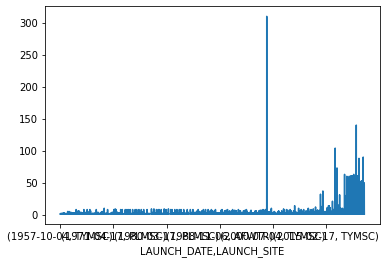

In [10]:
df_grouped_by_date_site['COUNT'].plot()

In [11]:
df_grouped_by_date_site.to_csv("payload_counts.csv")

In [12]:
# Finding the details of the spike!
df_grouped_by_date_site.sort_values(['COUNT'], ascending = False)

NORAD_CAT_ID    PERIOD  INCLINATION   APOGEE  \
LAUNCH_DATE LAUNCH_SITE                                                 
1998-11-20  TYMSC            13179108  27617.20     16002.76  72446.0   
2021-01-24  AFETR             6662538  13233.17     13640.69  70178.0   
2017-02-15  SRILR             4367948   9764.60     10118.12  48799.0   
2022-01-13  AFETR             4593222   8564.42      8774.91  48113.0   
2021-06-30  AFETR             4305180   8363.18      8581.04  46587.0   
...                               ...       ...          ...      ...   
1980-06-14  TYMSC               11841   1459.97        10.80  36261.0   
            PLMSC               11844     93.49        62.17    797.0   
1980-06-12  PLMSC               11837     89.72        72.84    298.0   
1980-06-05  TYMSC               11825     90.32        51.62    318.0   
2022-03-08  SMTS                51954     94.69        58.29    512.0   

                         PERIGEE       RCS  COUNT  
LAUNCH_DATE LAUNCH_SITE                            
1998-11-20  TYMSC        69560.0  413.7609    310  
2021-01-24  AFETR        68464.0    0.0000    140  
2017-02-15  SRILR        47881.0    8.8090    104  
2022-01-13  AFETR        46635.0    0.0000     90  
2021-06-30  AFETR        44987.0    0.0000     88  
...                          ...       ...    ...  
1980-06-14  TYMSC        36244.0    3.4440      1  
            PLMSC           94.0   11.4421      1  
1980-06-12  PLMSC          223.0    0.0000      1  
1980-06-05  TYMSC          262.0    0.0000      1  
2022-03-08  SMTS           495.0    0.0000      1  

[5715 rows x 7 columns]

# Exploring Launch Times

In [13]:
df_rb = df[df['OBJECT_TYPE'] == 'R/B'] #prevent over counting

In [14]:
df_grouped_by_month = df_rb.groupby(['MONTH']).sum()

In [15]:
df_grouped_by_month = df_grouped_by_month.sort_index()
df_grouped_by_month['COUNT'].head(12)

MONTH
01    376
02    462
03    502
04    523
05    473
06    557
07    521
08    541
09    550
10    603
11    498
12    688
Name: COUNT, dtype: int64

In [16]:
df_grouped_by_month.to_csv("month_counts.csv")

<AxesSubplot:xlabel='MONTH'>

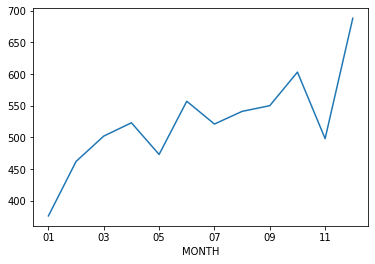

In [17]:
df_grouped_by_month['COUNT'].plot()

<AxesSubplot:xlabel='YEAR'>

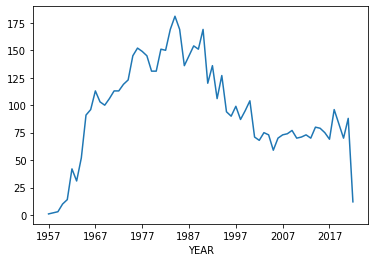

In [19]:
df_grouped_by_year = df_rb.groupby(['YEAR']).sum()
df_grouped_by_year = df_grouped_by_year.sort_index()
df_grouped_by_year['COUNT'].plot()

In [20]:
df_grouped_by_year.to_csv("year_counts.csv")